<a href="https://colab.research.google.com/github/fatuunreal/fatu-dm2/blob/main/fatu_dm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [49]:
datasets = pd.read_csv("diabetes.csv", sep=";")
print(datasets.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   Diabetes PedigreeFunction  Age  Outcome  Unnamed: 9 Unnamed: 10  
0                      0.127   47        1         NaN         NaN  
1                      0.233   23        0         NaN         NaN  
2                      0.630   31        1         NaN         NaN  
3                      0.365   24        1         NaN         NaN  
4                      0.536   21        0         NaN         NaN  


In [60]:
datasets = datasets.drop(columns=['Unnamed: 10', 'Unnamed: 9'])
datasets.columns = datasets.columns.str.strip()
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1040 entries, 1 to 1999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pregnancies                1040 non-null   int64  
 1   Glucose                    1040 non-null   float64
 2   BloodPressure              1040 non-null   float64
 3   SkinThickness              1040 non-null   float64
 4   Insulin                    1040 non-null   float64
 5   BMI                        1040 non-null   float64
 6   Diabetes PedigreeFunction  1040 non-null   float64
 7   Age                        1040 non-null   int64  
 8   Outcome                    1040 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 113.5 KB


In [53]:
print(datasets.isnull().sum())

Pregnancies                     0
Glucose                         0
BloodPressure                   0
SkinThickness                   0
Insulin                         0
BMI                             0
Diabetes PedigreeFunction       0
Age                             0
Outcome                         0
Unnamed: 9                   2000
Unnamed: 10                  1999
dtype: int64


In [52]:
# Menghitung jumlah dataset setelah preprocessing
num_rows = datasets.shape[0]
print(f"Jumlah dataset setelah preprocessing: {num_rows}")

Jumlah dataset setelah preprocessing: 2000


In [55]:
# Hapus data jika BloodPressure, SkinThickness, dan Insulin bernilai 0
datasets = datasets[(datasets.BloodPressure != 0) & (datasets.SkinThickness != 0) & (datasets.Insulin != 0)]

# Menghitung jumlah dataset setelah preprocessing
num_rows = datasets.shape[0]
print(f"Jumlah dataset setelah preprocessing: {num_rows}")

Jumlah dataset setelah preprocessing: 1040


In [59]:
# Imputasi nilai kosong dengan mean
imputer = SimpleImputer(strategy='mean')
datasets[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(datasets[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# Menghitung jumlah dataset setelah preprocessing
num_rows = datasets.shape[0]
print(f"Jumlah dataset setelah preprocessing: {num_rows}")

Jumlah dataset setelah preprocessing: 1040


In [61]:
print(datasets.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1            0     84.0           82.0           31.0    125.0  38.2   
3            0    135.0           68.0           42.0    250.0  42.3   
4            1    139.0           62.0           41.0    480.0  40.7   
5            0    173.0           78.0           32.0    265.0  46.5   
8            2     83.0           65.0           28.0     66.0  36.8   

   Diabetes PedigreeFunction  Age  Outcome  
1                      0.233   23        0  
3                      0.365   24        1  
4                      0.536   21        0  
5                      1.159   58        0  
8                      0.629   24        0  


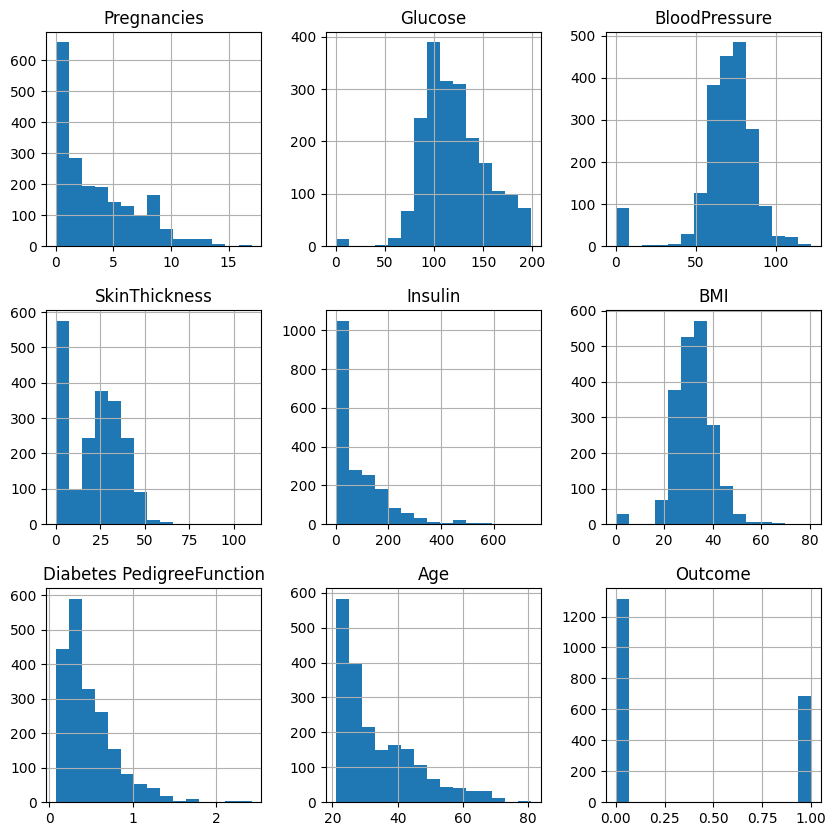

In [69]:
# Membuat Histrogram
data.hist(bins=15, figsize=(10, 10))
plt.show()

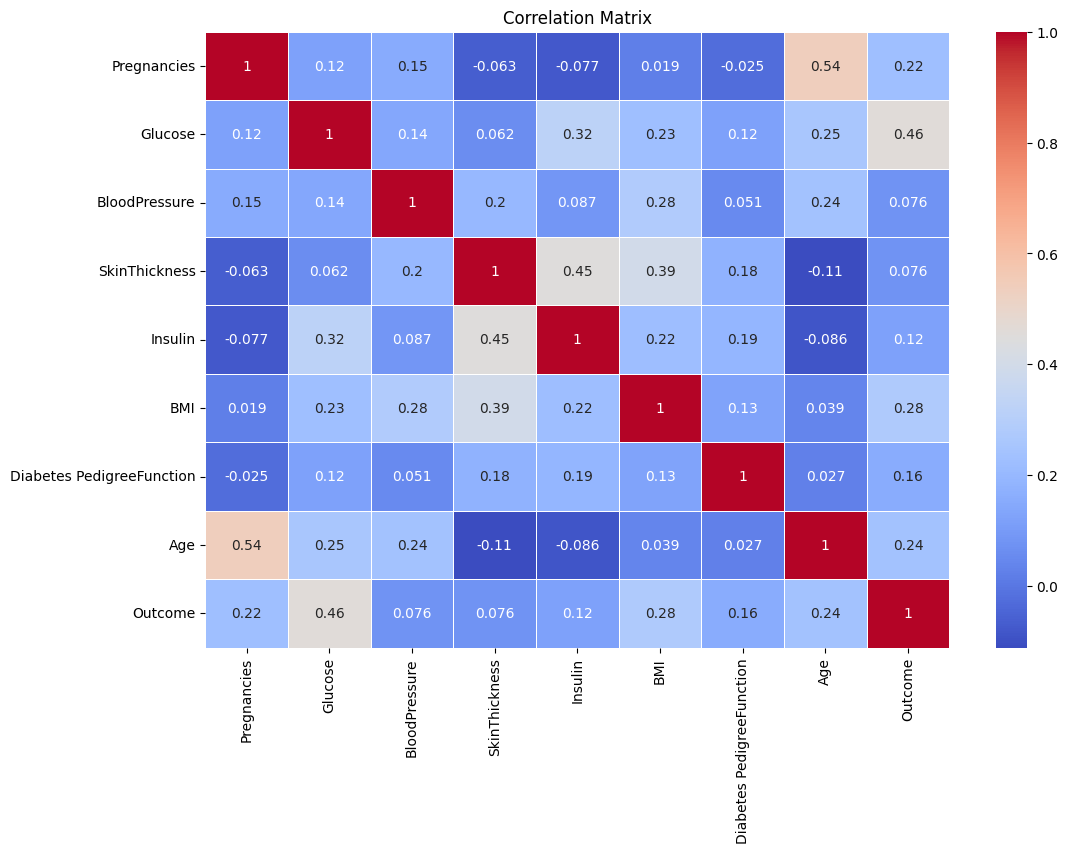

In [71]:
# Korelasi Marix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [74]:
# Separate features and target variable
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [75]:
# Import the necessary module
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [77]:
# Import the necessary module
from sklearn.preprocessing import StandardScaler # import StandardScaler

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Melatih Model Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Naive Bayes
Accuracy: 0.758
[[285  49]
 [ 72  94]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       334
           1       0.66      0.57      0.61       166

    accuracy                           0.76       500
   macro avg       0.73      0.71      0.72       500
weighted avg       0.75      0.76      0.75       500



In [84]:
# Evaluasi Akurasi
y_pred_train = nb_classifier.predict(X_train)
print("Akurasi pada data pelatihan:", accuracy_score(y_train, y_pred_train))
print("Akurasi pada data pengujian:", accuracy_score(y_test, y_pred))

Akurasi pada data pelatihan: 0.7553333333333333
Akurasi pada data pengujian: 0.758
